In [4]:
import pymysql
import pandas as pd
from IPython.display import display, clear_output
from ipywidgets import Dropdown

connect = pymysql.connect(host='127.0.0.1', user='root', password='0000', db='practice', charset='utf8')
cur = connect.cursor()

test = "SELECT * FROM practice.m_area;"
test1 = "SELECT * FROM practice.m_store;"
query = "SELECT * FROM practice.tbl_order_202104;"
query1 = "SELECT * FROM practice.tbl_order_202105;"
query2 = "SELECT * FROM practice.tbl_order_202106;"

cur.execute(test)
test = pd.DataFrame(cur.fetchall())
test.columns = ['area_cd', 'wide_area', 'narrow_area']

cur.execute(test1)
test1 = pd.DataFrame(cur.fetchall())
test1.columns = ['store_id', 'store_name', 'area_cd']

cur.execute(query)
data = pd.DataFrame(cur.fetchall())
data.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

cur.execute(query1)
data1 = pd.DataFrame(cur.fetchall())
data1.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                 'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

cur.execute(query2)
data2 = pd.DataFrame(cur.fetchall())
data2.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                 'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

order_data = pd.merge(test, test1, on='area_cd', how='left')
all = pd.concat([data,data1,data2],ignore_index=True)
all = pd.merge(all,order_data,on='store_id',how='left')


ValueError: Length mismatch: Expected axis has 0 elements, new values have 10 elements

In [3]:

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = all.loc[(all['store_name']==val['new'])&
                               (all['status'].isin([1,2]))]
    display(pick_data.head())

store_list = test1['store_name'].tolist()

dropdown = Dropdown(options=store_list,description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', index=2, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', …

AttributeError: 'builtin_function_or_method' object has no attribute 'loc'

In [ ]:
from ipywidgets import IntSlider
def store_lower(val):
    clear_output()
    display(slider)
    temp = all.groupby('store_name')
    print(temp.size()[temp.size()<val['new']])

slider = IntSlider(value=1100,min=1000,max=2000,step=100,description='건수:',)
slider.observe(store_lower,names='value')
display(slider)


IntSlider(value=1100, description='건수:', max=2000, min=1000, step=100)

In [ ]:
from ipywidgets import ToggleButtons

area_list = test['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = all.loc[
        (all['wide_area']==val['new'])&
        (all['status'].isin([1,2]))]
    display(pick_data.head())

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area,names='value')
display(toggle)

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

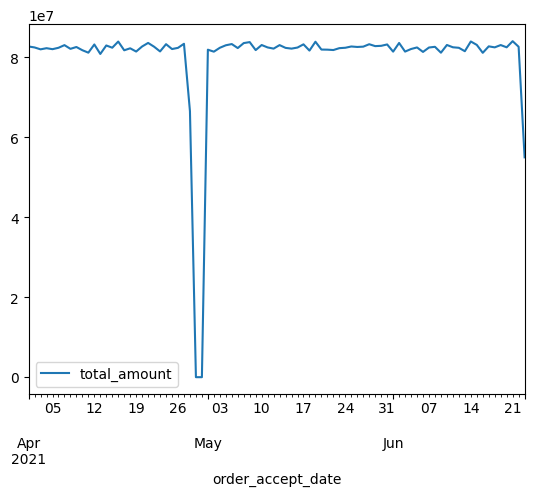

In [ ]:
from ipywidgets import ToggleButtons

area_list = test['wide_area'].unique()

def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = all.loc[
        (all['wide_area']==val['new'])&
        (all['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date','total_amount']].copy()
    temp.loc[:,'order_accept_date'] = \
        pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date',inplace=True)
    temp.resample('D').sum().plot()
 
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area,names='value')
display(toggle2)

In [ ]:
from ipywidgets import DatePicker
import datetime

all.loc[:,'order_date'] = pd.to_datetime(
    all['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = all.loc[
        (all['all']==val['new'])&
        (all['status'].isin([1,2]))]
    print(len(pick_data))
    display(pick_data.head())

date_picker = DatePicker(value=datetime.datetime(2021,4,1))
date_picker.observe(order_by_date,names='value')
display(date_picker)

DatePicker(value=datetime.datetime(2021, 4, 1, 0, 0), step=1)